In [1]:
print("Testing for PDF text extraction")

Testing for PDF text extraction


In [1]:
!pip install PyMuPDF spacy PyPDF2

In [41]:
import fitz  # PyMuPDF
import re

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF using PyMuPDF"""
    text = ""
    doc = fitz.open(pdf_path)
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text += page.get_text("text")
    return text

def extract_skills_and_certifications(text):
    """Extract skills and certifications from the text"""
    sections = {
        'skills': [],
        'certifications': []
    }

    # Regex to extract skills section
    skills_section_start = "Top Skills"
    certifications_section_start = "Certifications"
    skills_section_end = "Certifications"
    certifications_section_end = "Education"  # Assuming the education section follows certifications
    
    # Extract skills
    skills_start = re.search(skills_section_start, text, re.IGNORECASE)
    if skills_start:
        skills_text = text[skills_start.end():]
        skills_end = re.search(certifications_section_start, skills_text, re.IGNORECASE)
        skills_text = skills_text[:skills_end.start()] if skills_end else skills_text
        sections['skills'] = [line.strip() for line in skills_text.split('\n') if line.strip()]

    # Extract certifications
    certifications_start = re.search(certifications_section_start, text, re.IGNORECASE)
    if certifications_start:
        certifications_text = text[certifications_start.end():]
        certifications_end = re.search(certifications_section_end, certifications_text, re.IGNORECASE)
        certifications_text = certifications_text[:certifications_end.start()] if certifications_end else certifications_text
        # Extract only certifications, and remove any extra lines like education details
        sections['certifications'] = [line.strip() for line in certifications_text.split('\n') if line.strip() and not any(kw in line.lower() for kw in ['student', 'education', 'coimbatore', 'tamil', 'india', 'shaheenur rahman'])]

    return sections

def process_pdf_for_skills_and_certifications(pdf_path):
    """Process PDF to extract skills and certifications"""
    # Extract text from PDF
    text = extract_text_from_pdf(pdf_path)
    
    # Extract skills and certifications
    extracted_data = extract_skills_and_certifications(text)
    
    return extracted_data

# Example usage
pdf_path = "Profile.pdf"  # Path to your LinkedIn PDF file
extracted_data = process_pdf_for_skills_and_certifications(pdf_path)
print(extracted_data)


FileNotFoundError: no such file: 'Profile.pdf'

In [2]:
import fitz  # PyMuPDF
import re

def extract_text_from_pdf(pdf_path):
    """Extract text from a PDF using PyMuPDF"""
    text = ""
    doc = fitz.open(pdf_path)
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text += page.get_text("text")
    return text

def extract_skills_and_certifications(text):
    """Extract skills and certifications from the text"""
    sections = {
        'skills': [],
        'certifications': [],
        'education': [],
        'about': []
    }

    # Define regex patterns for sections
    skills_section_start = "Top Skills"
    certifications_section_start = "Certifications"
    education_section_start = "Education"
    
    # Extract skills
    skills_start = re.search(skills_section_start, text, re.IGNORECASE)
    if skills_start:
        skills_text = text[skills_start.end():]
        certifications_start = re.search(certifications_section_start, skills_text, re.IGNORECASE)
        skills_text = skills_text[:certifications_start.start()] if certifications_start else skills_text
        sections['skills'] = [line.strip() for line in skills_text.split('\n') if line.strip()]

    # Extract certifications
    certifications_start = re.search(certifications_section_start, text, re.IGNORECASE)
    if certifications_start:
        certifications_text = text[certifications_start.end():]
        education_start = re.search(education_section_start, certifications_text, re.IGNORECASE)
        certifications_text = certifications_text[:education_start.start()] if education_start else certifications_text
        sections['certifications'] = [line.strip() for line in certifications_text.split('\n') if line.strip()]

    # Extract education
    education_start = re.search(education_section_start, text, re.IGNORECASE)
    if education_start:
        education_text = text[education_start.end():]
        sections['education'] = [line.strip() for line in education_text.split('\n') if line.strip()]

    return sections

def process_pdf_for_skills_and_certifications(pdf_path):
    """Process PDF to extract skills and certifications"""
    # Extract text from PDF
    text = extract_text_from_pdf(pdf_path)
    
    # Extract skills and certifications
    extracted_data = extract_skills_and_certifications(text)
    
    return extracted_data

# Example usage
pdf_path = "Profile.pdf"  # Path to your LinkedIn PDF file
extracted_data = process_pdf_for_skills_and_certifications(pdf_path)
print(extracted_data)


{'skills': ['Artificial Intelligence (AI)', 'Artificial Intelligence for Business', 'Generative AI'], 'certifications': ['Python for Data Science, AI &', 'Development', 'Linear Algebra: Matrix Algebra,', 'Determinants, & Eigenvectors', 'Introduction to Generative AI', 'What Is Generative AI?', 'Prompt Engineering for ChatGPT', 'Shaheenur Rahman M', 'Student at Sri Krishna College of Technology | Pursuing B.Tech', 'Artificial Intelligence and Data Science', 'Coimbatore, Tamil Nadu, India'], 'education': ['Sri Krishna College of Technology', 'Bachelor of Technology - BTech,\xa0Artificial Intelligence\xa0·\xa0(September', '2023\xa0-\xa0April 2027)', 'Page 1 of 1'], 'about': []}


In [5]:
import fitz  # PyMuPDF
import re

def extract_text_from_pdf(pdf_path):
    """Extracts raw text from the entire PDF."""
    text = ""
    doc = fitz.open(pdf_path)
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text += page.get_text("text")
    return text

def extract_skills_from_text(text):
    """
    Extracts the 'Top Skills' section dynamically.
    """
    # Locate the "Top Skills" section
    start_match = re.search(r'Top Skills', text, re.IGNORECASE)
    if not start_match:
        return []

    # Extract text after "Top Skills"
    skills_text = text[start_match.end():]

    # Stop at the next known section (e.g., Certifications, Education, etc.)
    stop_keywords = ['Certifications', 'Education', 'About', 'Experience']
    stop_index = len(skills_text)
    for keyword in stop_keywords:
        match = re.search(r'\b' + re.escape(keyword) + r'\b', skills_text, re.IGNORECASE)
        if match and match.start() < stop_index:
            stop_index = match.start()

    # Isolate just the skills part
    skills_text = skills_text[:stop_index]

    # Split and clean skills
    skills = [line.strip() for line in skills_text.split('\n') if line.strip()]
    return skills

def get_skills_from_pdf(pdf_path):
    """Main function to extract only skills from the given PDF."""
    text = extract_text_from_pdf(pdf_path)
    skills = extract_skills_from_text(text)
    return {'skills': skills}

# ✅ Example usage:
pdf_path = "Profile.pdf"  # Update with your PDF path
skills_data = get_skills_from_pdf(pdf_path)
print(skills_data)


{'skills': ['Artificial Intelligence (AI)', 'Artificial Intelligence for Business', 'Generative AI']}


In [16]:
import fitz  # PyMuPDF
import re

# Large, clean, predefined skill set (already very comprehensive)
Predefined_Skills = {
    # Technical Skills
    "Python", "Java", "C++", "JavaScript", "HTML", "CSS", "React", "Redux",
    "Node.Js", "SQL", "MongoDB", "PostgreSQL", "Docker", "Kubernetes", "Terraform",
    "AWS", "Azure", "GCP", "Linux", "Cybersecurity", "Ethical Hacking", "Cloud Computing",
    "Networking", "Firewalls", "Machine Learning", "Deep Learning", "NLP", "Computer Vision",
    "Generative AI", "TensorFlow", "PyTorch", "Scikit-Learn", "Pandas", "NumPy", "Matplotlib",
    "Data Analysis", "Data Science", "Power BI", "Tableau", "Excel", "Jenkins", "CI/CD", "DevOps",
    "Software Development", "Microservices", "Spring Boot", "Django", "Flask", "Bootstrap",
    "REST API", "GraphQL", "Agile", "Scrum", "Blockchain", "Solidity", "Smart Contracts",
    "Cloud Security", "Data Engineering", "Big Data", "Hadoop", "Spark", "Kafka",
    "Embedded Systems", "IoT", "Robotics", "Quantum Computing", "Bioinformatics",
    "Computer Architecture", "Operating Systems", "Parallel Computing", "Edge Computing",
    "Digital Signal Processing", "Image Processing", "Speech Recognition", "Autonomous Systems",
    "Augmented Reality", "Virtual Reality", "Game Development", "3D Modeling", "Simulation",
    
    # Non-Technical Skills
    "Project Management", "Business Analysis", "Product Management", "Budgeting", "Strategic Planning",
    "HR Policies", "Recruitment", "Onboarding", "Compliance", "Risk Management", "Legal Review",
    "Negotiation", "Payroll", "Data Cleaning", "Data Visualization", "Research Papers", "Survey Design",
    "Training Programs", "Documentation", "Workshops", "Workforce Modeling", "Performance Appraisal",
    "Market Research", "Financial Analysis", "Supply Chain Management", "Operations Management",
    "Customer Relationship Management (CRM)", "Public Relations", "Event Planning",
    "Business Intelligence", "Competitive Analysis", "Process Optimization", "Lean Six Sigma",
    "Change Management", "Stakeholder Management", "Corporate Strategy", "Brand Management",
    "Customer Retention", "Sales Strategies", "Marketing Analytics", "Advertising",
    
    # Soft Skills
    "Communication", "Collaboration", "Leadership", "Problem-Solving", "Critical Thinking",
    "Creativity", "Emotional Intelligence", "Time Management", "Conflict Resolution",
    "Adaptability", "Decision Making", "Interpersonal Skills", "Public Speaking",
    "Customer Support", "Follow-Up", "Teamwork", "Persuasion", "Active Listening",
    "Coaching", "Mentoring", "Presentation Skills", "Resilience", "Empathy",
    "Work Ethic", "Professionalism", "Self-Motivation", "Cultural Awareness",
    "Stress Management", "Negotiation Skills", "Networking", "Personal Branding",
    "Self-Discipline", "Growth Mindset", "Influence", "Assertiveness", "Emotional Regulation",
    "Storytelling", "Active Learning", "Mindfulness", "Decision-Making Under Pressure",
    
    # Additional Skills
    "LinkedIn Recruiter", "ATS Optimization", "Data Governance", "Compliance Auditing",
    "Security Auditing", "Web Scraping", "Google Analytics", "SEO", "Digital Marketing",
    "Content Writing", "UX/UI Design", "Wireframing", "Prototyping", "Usability Testing",
    "HR Metrics", "Talent Management", "KPI Analysis", "Scenario Planning",
    "Sales Strategies", "Customer Retention", "Brand Management", "Social Media Marketing",
    "Video Editing", "Graphic Design", "Photography", "Animation", "Game Development",
    "Legal Compliance", "Contract Negotiation", "Crisis Management", "Public Policy",
    "Sustainability", "Corporate Social Responsibility", "Ethical Leadership",
    "Diversity & Inclusion", "Environmental Science", "Urban Planning", "Behavioral Economics"
}


def extract_text_from_pdf(pdf_path):
    """Extract raw text from a PDF file using PyMuPDF."""
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text()
    return text

def extract_skills_with_exact_match(text, skill_set):
    """Extract skills using exact case-insensitive matching and word boundaries."""
    found_skills = set()
    for skill in skill_set:
        # Build regex with word boundaries for exact match
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, text, re.IGNORECASE):
            found_skills.add(skill)
    return {'skills': sorted(found_skills)}

# Example usage
pdf_path = "Profile_test1.pdf"
text = extract_text_from_pdf(pdf_path)
skills = extract_skills_with_exact_match(text, PREDEFINED_SKILLS)

print(skills)


{'skills': ['Communication', 'Training']}


In [27]:
import fitz  # PyMuPDF
import json
import re

# STEP 1: Extract text from the PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text()
    return text

# STEP 2: Load skills from the external JSON file
def load_skills_from_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return set(data.get('skills', []))

# STEP 3: Match exact skills using regex (case-insensitive, word boundaries)
def extract_skills_with_exact_match(text, skill_set):
    found_skills = set()
    for skill in skill_set:
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, text, re.IGNORECASE):
            found_skills.add(skill)
    return {'skills': sorted(found_skills)}

# Example usage
pdf_path = "test2.pdf"
skills_file = "skills.json"

# Load everything
text = extract_text_from_pdf(pdf_path)
skill_set = load_skills_from_json(skills_file)
extracted_skills = extract_skills_with_exact_match(text, skill_set)

print(extracted_skills)


{'skills': ['Artificial Intelligence', 'Data Science', 'Machine Learning', 'Matplotlib', 'Pandas', 'Predictive Modeling', 'Python']}


In [39]:
import fitz  # PyMuPDF
import json
import re

# STEP 1: Extract raw text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text()
    return text

# STEP 2: Normalize text (remove extra whitespace, replace | with space)
def normalize_text(text):
    text = text.replace('|', ' ')  # Treat '|' as space separator
    text = re.sub(r'\s+', ' ', text)  # Collapse multiple spaces/newlines into one
    return text.strip().lower()

def normalize_skill(skill):
    return re.sub(r'\s+', ' ', skill).strip().lower()

# STEP 3: Load skills from a JSON file
def load_skills_from_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return set(data.get('skills', []))

# STEP 4: Match each normalized skill against the normalized text
# def extract_skills_with_exact_match(text, skill_set):
#     found_skills = set()
#     normalized_text = normalize_text(text)
#     for skill in skill_set:
#         normalized_skill = normalize_skill(skill)
#         # Use word boundary to avoid partial match only for single-word skills
#         if re.search(r'\b' + re.escape(normalized_skill) + r'\b', normalized_text, re.IGNORECASE) or normalized_skill in normalized_text:
#             found_skills.add(skill)  # Keep original skill name (with casing)
#     return {'skills': sorted(found_skills)}

def extract_skills_with_exact_match(text, skill_set):
    found_skills = set()
    normalized_text = normalize_text(text)
    for skill in skill_set:
        normalized_skill = normalize_skill(skill)
        # Check if the skill is a single word (like "R", "C")
        if len(normalized_skill.split()) == 1:
            # Use word boundary regex to avoid partial matches
            if re.search(r'\b' + re.escape(normalized_skill) + r'\b', normalized_text):
                found_skills.add(skill)
        else:
            # For multi-word skills, simple substring check is enough
            if normalized_skill in normalized_text:
                found_skills.add(skill)
    return {'skills': sorted(found_skills)}


# Example usage
pdf_path = "Profile_test1.pdf"  # Replace with your actual file
skills_file = "skills.json"

text = extract_text_from_pdf(pdf_path)
skill_set = load_skills_from_json(skills_file)
extracted_skills = extract_skills_with_exact_match(text, skill_set)

print(extracted_skills)


{'skills': ['Communication', 'IoT', 'Mathematics', 'Training']}


In [40]:
# Final version of the code


import fitz  # PyMuPDF
import json
import re

# STEP 1: Extract raw text from PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text()
    return text

# STEP 2: Normalize text (remove extra whitespace, replace | with space)
def normalize_text(text):
    text = text.replace('|', ' ')  # Treat '|' as space separator
    text = re.sub(r'\s+', ' ', text)  # Collapse multiple spaces/newlines into one
    return text.strip().lower()

def normalize_skill(skill):
    return re.sub(r'\s+', ' ', skill).strip().lower()

# STEP 3: Load skills from a JSON file
def load_skills_from_json(json_path):
    with open(json_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return set(data.get('skills', []))

# STEP 4: Match each normalized skill against the normalized text
def extract_skills_with_exact_match(text, skill_set):
    found_skills = set()
    normalized_text = normalize_text(text)
    for skill in skill_set:
        normalized_skill = normalize_skill(skill)
        # Check if the skill is a single word (like "R", "C")
        if len(normalized_skill.split()) == 1:
            # Use word boundary regex to avoid partial matches
            if re.search(r'\b' + re.escape(normalized_skill) + r'\b', normalized_text):
                found_skills.add(skill)
        else:
            # For multi-word skills, simple substring check is enough
            if normalized_skill in normalized_text:
                found_skills.add(skill)
    return {'skills': sorted(found_skills)}


# Example usage
pdf_path = "test3.pdf"  # Replace with your actual file
skills_file = "skills.json"

text = extract_text_from_pdf(pdf_path)
skill_set = load_skills_from_json(skills_file)
extracted_skills = extract_skills_with_exact_match(text, skill_set)

print(extracted_skills)


{'skills': ['AI Prompt', 'Artificial Intelligence', 'DSA', 'Data Science', 'Django', 'Prompt', 'Prompting', 'Python']}


1064 duplicates found
Dataset Shape: (18936, 6)

Sample Data:
            Job Title                    Domain  \
0        Data Analyst  Data Science & Analytics   
1  Penetration Tester             Cybersecurity   
2          HR Analyst              HR Analytics   
3          HR Analyst              HR Analytics   
4       Web3 Engineer         Blockchain & Web3   

                                     Required Skills Qualification  \
0  dax dashboards excel pivot tables sql tableau vba    Bachelor's   
1  burp suite ethical hacking exploit development...           PhD   
2  dashboarding data cleaning data visualization ...           MBA   
3  dashboarding data cleaning data visualization ...           PhD   
4  chainlink hardhat react smart contracts solana...      Master's   

  Demand Level         Salary Range  
0       Medium  $120,000 - $150,000  
1          Low    $50,000 - $70,000  
2         High    $50,000 - $70,000  
3         High   $90,000 - $120,000  
4          Low   $90

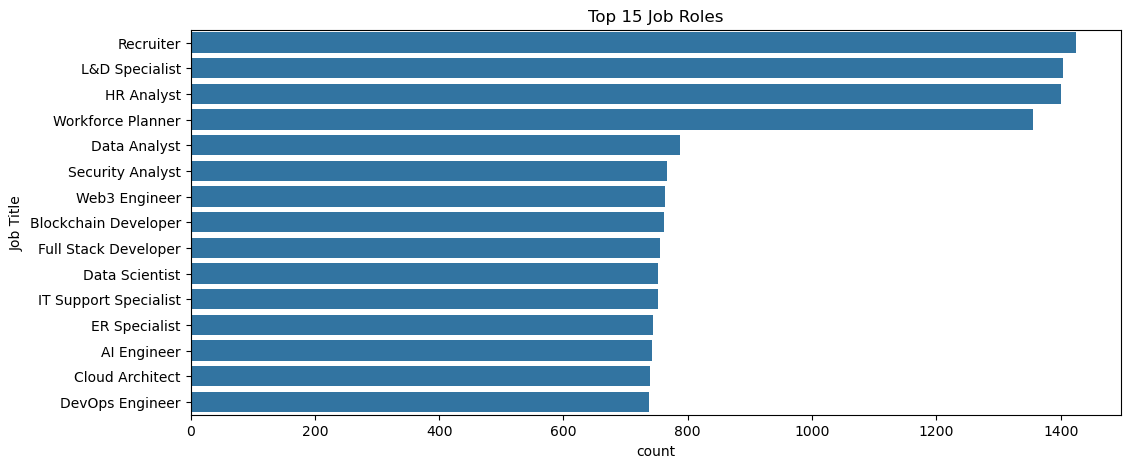

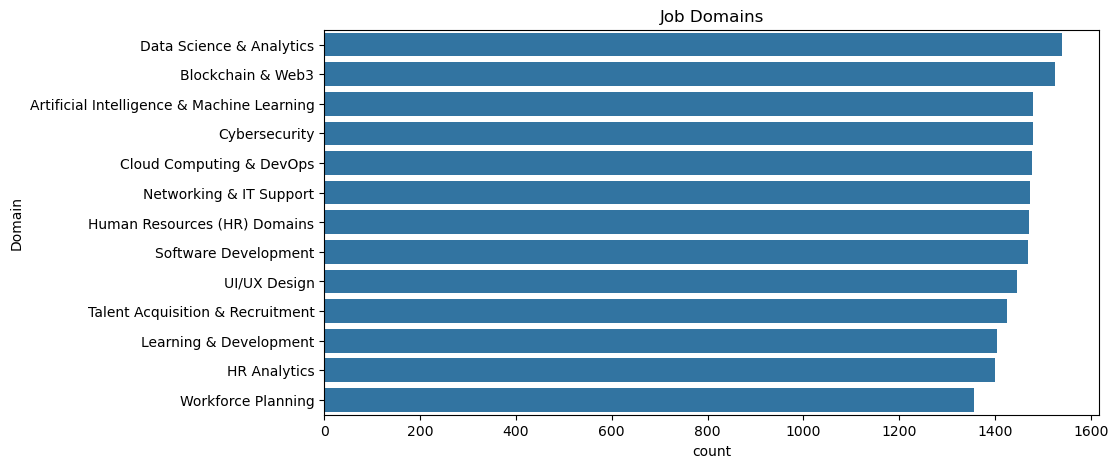


Classification Report (Role + Domain):
                                                             precision    recall  f1-score   support

  AI Engineer || Artificial Intelligence & Machine Learning       1.00      1.00      1.00       140
                  Backend Developer || Software Development       1.00      1.00      1.00       137
                  Blockchain Developer || Blockchain & Web3       1.00      1.00      1.00       153
                Cloud Architect || Cloud Computing & DevOps       1.00      1.00      1.00       146
                   Data Analyst || Data Science & Analytics       1.00      1.00      1.00       169
                 Data Scientist || Data Science & Analytics       0.99      1.00      1.00       131
                DevOps Engineer || Cloud Computing & DevOps       1.00      1.00      1.00       151
              ER Specialist || Human Resources (HR) Domains       1.00      1.00      1.00       136
               Full Stack Developer || Software De

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Skill normalization mapping
# ---------------------------
skill_mapping = {
    "ml": "machine learning",
    "dl": "deep learning",
    "ai": "artificial intelligence",
    "rest api": "rest api",
    "rest apis": "rest api",
    "restful api": "rest api",
    "restful": "rest api",
    "rest": "rest api",
    "springboot": "spring boot",
    "spring-boot": "spring boot",
    "apis": "api",
    "large language models": "llms",
    "large language model": "llms",
    "llm": "llms",
    "natural language understanding": "natural language processing",
    "natural language generation": "natural language processing",
    "nlp": "natural language processing",
    "Natural language processing": "natural language processing",
    "viz": "visualization",
    "data viz": "data visualization",
    "tensorflow 2.0": "tensorflow",
    "py": "python",
    "react": "react",
    "react js": "react",
    "react.js": "react",
    "js": "javascript",
    "c plus plus": "c++",
    "cpp": "c++",
    "csharp": "c#",
    "rdbms": "relational database",
    "sql server": "sql",
    "postgressql": "postgresql",
    "nosql db": "nosql",
    "xgboost": "gradient boosting",
    "gboost": "gradient boosting",
    "pytorch": "deep learning",
    "prompting": "prompt engineering",
    "prompt": "prompt engineering",
    "AI prompt": "prompt engineering",
    "AI prompting": "prompt engineering",
    "convolutional neural network": "cnn",
    "convolutional neural networks": "cnn",
    "convolutional neural net": "cnn",
    "convolutional neural nets": "cnn",
    "recurrent neural network": "rnn",
    "recurrent neural networks": "rnn",
    "recurrent neural net": "rnn",
    "recurrent neural nets": "rnn",
    "long short term memory": "lstm",
    "long short term memory networks": "lstm",
    "long short term memory net": "lstm",
    "Genarative adversarial networks": "gans",
    "Generative adversarial network": "gans",
    "ML pipeline": "ml pipelines",
    "MLpipeline": "ml pipelines",
    "MLOps": "ml ops",
    "stats":"Statistics",
    "stat":"Statistics",
    "maths":"Mathematics",
    "math":"Mathematics",
    "algorithm" : "algorithms",
    "Data structures" : "Data structures",
    "Data structure" : "Data structures",
    "DSA": "DSA",
    "System designing":"system design",
    "System design":"system design",
    "Oops":"OOP",
    "Object oriented programming":"OOP",
    "Object oriented programming language":"OOP",
}

def normalize_skills(skill_string):
    tokens = re.findall(r'\b[\w\-\+#.]+\b', skill_string.lower())
    normalized_tokens = []
    for token in tokens:
        token = token.replace('_', ' ')
        normalized = skill_mapping.get(token, token)
        normalized_tokens.append(normalized)
    return ' '.join(normalized_tokens)

# ---------------------------
# Load dataset
# ---------------------------
df = pd.read_csv("job_postings.csv")
print(df.duplicated().sum(), "duplicates found")
df.drop_duplicates(inplace=True)

# Convert and normalize skills
df['Required Skills'] = df['Required Skills'].apply(ast.literal_eval)
df['Required Skills'] = df['Required Skills'].apply(lambda x: normalize_skills(' '.join(x)))

# ---------------------------
# Basic EDA
# ---------------------------
print("Dataset Shape:", df.shape)
print("\nSample Data:")
print(df.head())

plt.figure(figsize=(12, 5))
sns.countplot(y=df['Job Title'], order=df['Job Title'].value_counts().index[:15])
plt.title('Top 15 Job Roles')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Domain'], order=df['Domain'].value_counts().index)
plt.title('Job Domains')
plt.show()

# ---------------------------
# Prepare combined label
# ---------------------------
df['Combined_Label'] = df['Job Title'] + " || " + df['Domain']
le_combined = LabelEncoder()
df['Combined_encoded'] = le_combined.fit_transform(df['Combined_Label'])

# ---------------------------
# TF-IDF and train/test split
# ---------------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Required Skills'])
y_combined = df['Combined_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_combined, test_size=0.2, random_state=42
)

# ---------------------------
# Train model
# ---------------------------
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# Evaluate model
# ---------------------------
print("\nClassification Report (Role + Domain):")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le_combined.classes_))

# ---------------------------
# Inference Function with Skill Match Check
# ---------------------------
def predict_role_domain(input_skills, min_match=2):
    input_processed = normalize_skills(' '.join(input_skills))
    input_tokens = set(input_processed.split())
    vocab_set = set(vectorizer.vocabulary_.keys())
    matched_skills = input_tokens.intersection(vocab_set)

    if len(matched_skills) < min_match:
        return "Insufficient skill match", "Insufficient skill match"

    vectorized = vectorizer.transform([input_processed])
    pred_encoded = model.predict(vectorized)[0]
    combined = le_combined.inverse_transform([pred_encoded])[0]
    role, domain = combined.split(" || ")
    return role, domain

def show_top_matches(input_skills, top_n=5):
    input_processed = normalize_skills(' '.join(input_skills))
    vectorized = vectorizer.transform([input_processed])
    probs = model.predict_proba(vectorized)[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]
    for i in top_indices:
        print(f"{le_combined.inverse_transform([i])[0]} --> {probs[i]:.3f}")



205 Duplicated Rows Found
Dataset Shape: (3390, 3)

Sample Data:
                                        Domain            Role  \
0  Artificial Intelligence & Machine Learning   AI Researcher   
1  Artificial Intelligence & Machine Learning  Data Scientist   
2  Artificial Intelligence & Machine Learning     DL Engineer   
3  Artificial Intelligence & Machine Learning     AI Engineer   
4  Artificial Intelligence & Machine Learning     DL Engineer   

                                              Skills  
0  statistics reinforcement learning natural lang...  
1  numpy python pandas machine learning mathemati...  
2     rnn tensorflow cnn deep learning deep learning  
3  transformers prompt engineering engineering de...  
4     deep learning deep learning rnn cnn tensorflow  


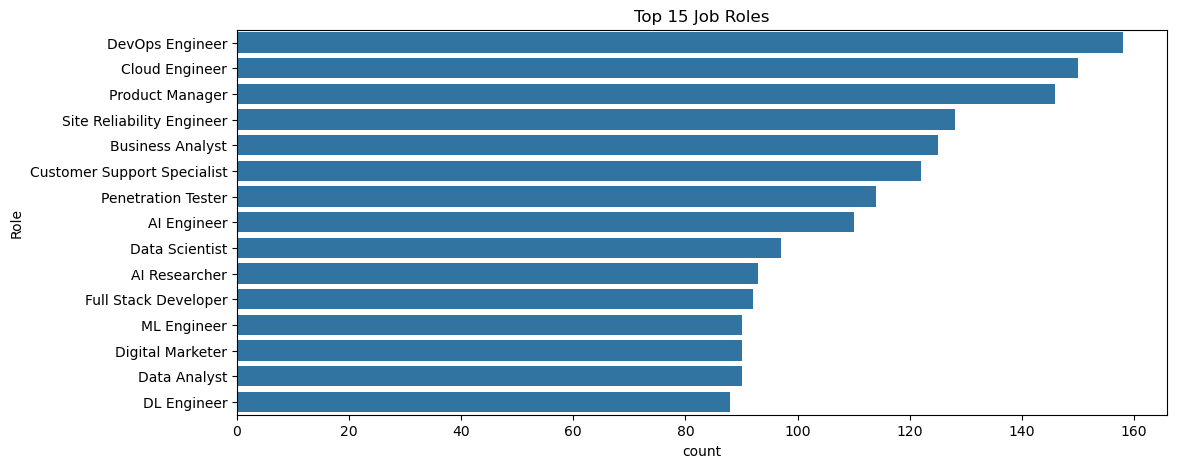

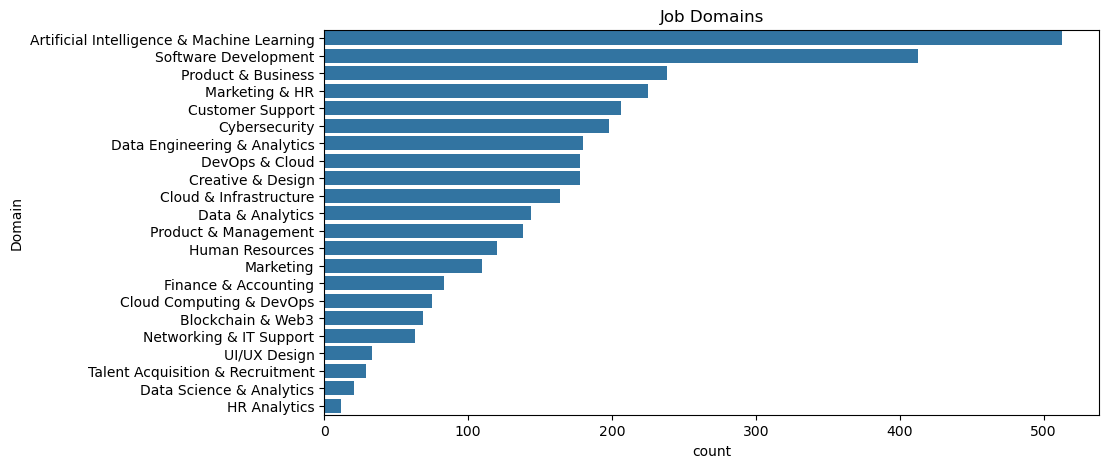


Classification Report (Role + Domain):
                                                               precision    recall  f1-score   support

    AI Engineer || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        29
  AI Researcher || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        18
                           Accountant || Finance & Accounting       1.00      1.00      1.00         4
           Analytics Engineer || Data Engineering & Analytics       1.00      1.00      1.00        12
                              Auditor || Finance & Accounting       1.00      1.00      1.00         8
                             BI Developer || Data & Analytics       0.92      1.00      0.96        12
                 BI Developer || Data Engineering & Analytics       1.00      1.00      1.00         8
                    Backend Developer || Software Development       1.00      1.00      1.00        17
                    Blockchain D

In [7]:
# ---------------------- IMPORTS ----------------------
import pandas as pd
import numpy as np
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------- SKILL NORMALIZATION ----------------------
skill_mapping = {
    "ml": "machine learning", "dl": "deep learning", "ai": "artificial intelligence",
    "rest api": "rest api", "rest apis": "rest api", "restful api": "rest api",
    "restful": "rest api", "rest": "rest api", "springboot": "spring boot",
    "spring-boot": "spring boot", "apis": "api", "large language models": "llms",
    "large language model": "llms", "llm": "llms", "natural language understanding": "natural language processing",
    "natural language generation": "natural language processing", "nlp": "natural language processing",
    "Natural language processing": "natural language processing", "viz": "visualization",
    "data viz": "data visualization", "tensorflow 2.0": "tensorflow", "py": "python",
    "react": "react", "react js": "react", "react.js": "react", "js": "javascript",
    "c plus plus": "c++", "cpp": "c++", "csharp": "c#", "rdbms": "relational database",
    "sql server": "sql", "postgressql": "postgresql", "nosql db": "nosql",
    "xgboost": "gradient boosting", "gboost": "gradient boosting", "pytorch": "deep learning",
    "prompting": "prompt engineering", "prompt": "prompt engineering", "AI prompt": "prompt engineering",
    "AI prompting": "prompt engineering", "convolutional neural network": "cnn",
    "convolutional neural networks": "cnn", "convolutional neural net": "cnn",
    "convolutional neural nets": "cnn", "recurrent neural network": "rnn",
    "recurrent neural networks": "rnn", "recurrent neural net": "rnn",
    "recurrent neural nets": "rnn", "long short term memory": "lstm",
    "long short term memory networks": "lstm", "long short term memory net": "lstm",
    "Genarative adversarial networks": "gans", "Generative adversarial network": "gans",
    "ML pipeline": "ml pipelines", "MLpipeline": "ml pipelines", "MLOps": "ml ops",
    "stats": "Statistics", "stat": "Statistics", "maths": "Mathematics", "math": "Mathematics",
    "algorithm": "algorithms", "Data structures": "Data structures", "Data structure": "Data structures",
    "DSA": "DSA", "System designing": "system design", "System design": "system design",
    "Oops": "OOP", "Object oriented programming": "OOP", "Object oriented programming language": "OOP"
}

def normalize_skills(skill_string):
    tokens = re.findall(r'\b[\w\-\+#.]+\b', skill_string.lower())
    normalized_tokens = []
    for token in tokens:
        token = token.replace('_', ' ')
        normalized = skill_mapping.get(token, token)
        normalized_tokens.append(normalized)
    return ' '.join(normalized_tokens)

# ---------------------- LOAD DATA ----------------------
df = pd.read_csv("final.csv")
print(df.duplicated().sum(), "Duplicated Rows Found")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert and normalize skills
df['Skills'] = df['Skills'].apply(ast.literal_eval)
df['Skills'] = df['Skills'].apply(lambda x: normalize_skills(' '.join(x)))

# ---------------------- EDA (Optional) ----------------------
print("Dataset Shape:", df.shape)
print("\nSample Data:\n", df.head())

plt.figure(figsize=(12, 5))
sns.countplot(y=df['Role'], order=df['Role'].value_counts().index[:15])
plt.title('Top 15 Job Roles')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Domain'], order=df['Domain'].value_counts().index)
plt.title('Job Domains')
plt.show()

# ---------------------- LABEL ENCODING ----------------------
df['Combined_Label'] = df['Role'] + " || " + df['Domain']
le_combined = LabelEncoder()
df['Combined_encoded'] = le_combined.fit_transform(df['Combined_Label'])

# ---------------------- VECTORIZATION ----------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Skills'])
y_combined = df['Combined_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_combined, test_size=0.2, random_state=42
)

# ---------------------- MODEL TRAINING ----------------------
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# ---------------------- EVALUATION ----------------------
print("\nClassification Report (Role + Domain):")
y_pred = model.predict(X_test)

# Fix: Only include labels present in y_test/y_pred
labels_in_test = unique_labels(y_test, y_pred)
target_names = le_combined.inverse_transform(labels_in_test)

print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=target_names))

# ---------------------- INFERENCE FUNCTIONS ----------------------
def predict_role_domain(input_skills, min_match=2):
    input_processed = normalize_skills(' '.join(input_skills))
    input_tokens = set(input_processed.split())
    vocab_set = set(vectorizer.vocabulary_.keys())
    matched_skills = input_tokens.intersection(vocab_set)

    if len(matched_skills) < min_match:
        return "Insufficient skill match", "Insufficient skill match"

    vectorized = vectorizer.transform([input_processed])
    pred_encoded = model.predict(vectorized)[0]
    combined = le_combined.inverse_transform([pred_encoded])[0]
    role, domain = combined.split(" || ")
    return role, domain

def show_top_matches(input_skills, top_n=5):
    input_processed = normalize_skills(' '.join(input_skills))
    vectorized = vectorizer.transform([input_processed])
    probs = model.predict_proba(vectorized)[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]
    print("\nTop Matching Roles + Domains:")
    for i in top_indices:
        print(f"{le_combined.inverse_transform([i])[0]} --> {probs[i]:.3f}")

# ---------------------- SAMPLE TEST ----------------------
print("\n--- SAMPLE TEST ---")
sample_input = ['python', 'machine learning', 'pandas', 'rest api']
role, domain = predict_role_domain(sample_input)
print("Predicted Role:", role)
print("Predicted Domain:", domain)

show_top_matches(sample_input)


205 Duplicated Rows Found
Dataset Shape: (3390, 3)

Sample Data:
                                        Domain            Role  \
0  Artificial Intelligence & Machine Learning   AI Researcher   
1  Artificial Intelligence & Machine Learning  Data Scientist   
2  Artificial Intelligence & Machine Learning     DL Engineer   
3  Artificial Intelligence & Machine Learning     AI Engineer   
4  Artificial Intelligence & Machine Learning     DL Engineer   

                                              Skills  
0  statistics, reinforcement learning, natural la...  
1  numpy, python, pandas, machine learning, mathe...  
2  rnn, tensorflow, cnn, deep learning, deep lear...  
3  transformers, prompt engineering engineering, ...  
4  deep learning, deep learning, rnn, cnn, tensor...  


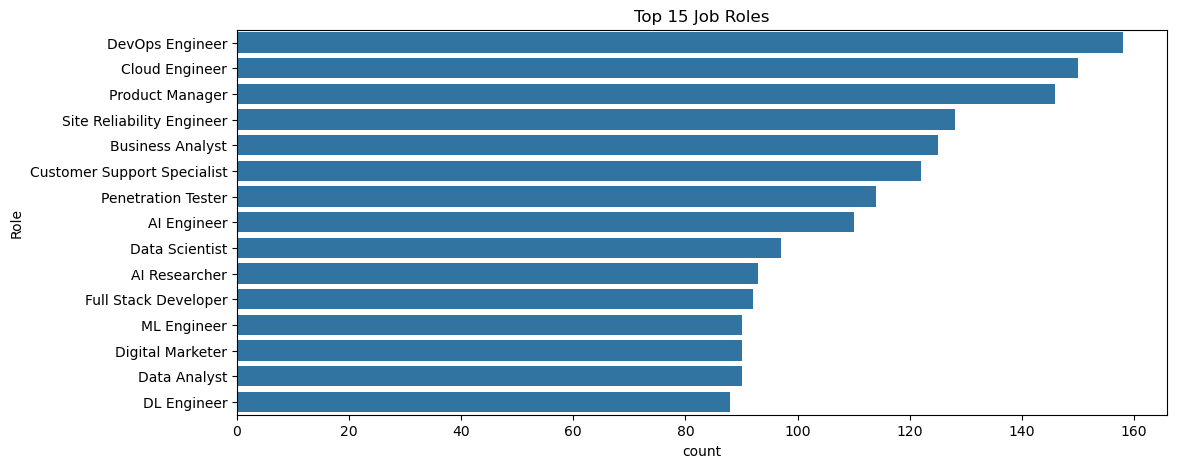

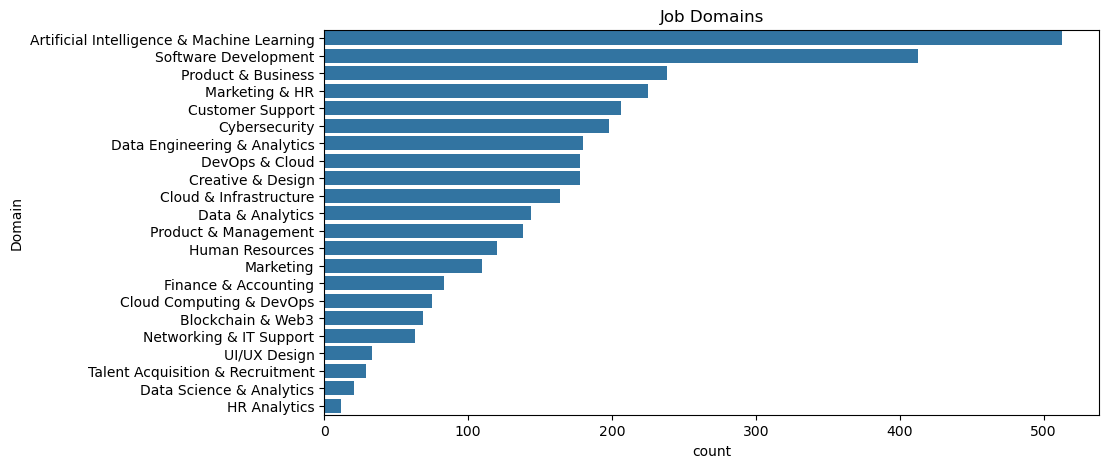


Classification Report (Role + Domain):
                                                               precision    recall  f1-score   support

    AI Engineer || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        29
  AI Researcher || Artificial Intelligence & Machine Learning       1.00      1.00      1.00        18
                           Accountant || Finance & Accounting       1.00      1.00      1.00         4
           Analytics Engineer || Data Engineering & Analytics       1.00      1.00      1.00        12
                              Auditor || Finance & Accounting       1.00      1.00      1.00         8
                             BI Developer || Data & Analytics       0.92      1.00      0.96        12
                 BI Developer || Data Engineering & Analytics       1.00      0.88      0.93         8
                    Backend Developer || Software Development       1.00      1.00      1.00        17
                    Blockchain D

In [14]:
# ---------------------- IMPORTS ----------------------
import pandas as pd
import numpy as np
import ast
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# ---------------------- SKILL NORMALIZATION ----------------------
skill_mapping = {
    "ml": "machine learning", "dl": "deep learning", "ai": "artificial intelligence",
    "rest api": "rest api", "rest apis": "rest api", "restful api": "rest api",
    "restful": "rest api", "rest": "rest api", "springboot": "spring boot",
    "spring-boot": "spring boot", "apis": "api", "large language models": "llms",
    "large language model": "llms", "llm": "llms", "natural language understanding": "natural language processing",
    "natural language generation": "natural language processing", "nlp": "natural language processing",
    "Natural language processing": "natural language processing", "viz": "visualization",
    "data viz": "data visualization", "tensorflow 2.0": "tensorflow", "py": "python",
    "react": "react", "react js": "react", "react.js": "react", "js": "javascript",
    "c plus plus": "c++", "cpp": "c++", "csharp": "c#", "rdbms": "relational database",
    "sql server": "sql", "postgressql": "postgresql", "nosql db": "nosql",
    "xgboost": "gradient boosting", "gboost": "gradient boosting", "pytorch": "deep learning",
    "prompting": "prompt engineering", "prompt": "prompt engineering", "AI prompt": "prompt engineering",
    "AI prompting": "prompt engineering", "convolutional neural network": "cnn",
    "convolutional neural networks": "cnn", "convolutional neural net": "cnn",
    "convolutional neural nets": "cnn", "recurrent neural network": "rnn",
    "recurrent neural networks": "rnn", "recurrent neural net": "rnn",
    "recurrent neural nets": "rnn", "long short term memory": "lstm",
    "long short term memory networks": "lstm", "long short term memory net": "lstm",
    "Genarative adversarial networks": "gans", "Generative adversarial network": "gans",
    "ML pipeline": "ml pipelines", "MLpipeline": "ml pipelines", "MLOps": "ml ops",
    "stats": "Statistics", "stat": "Statistics", "maths": "Mathematics", "math": "Mathematics",
    "algorithm": "algorithms", "Data structures": "Data structures", "Data structure": "Data structures",
    "DSA": "DSA", "System designing": "system design", "System design": "system design",
    "Oops": "OOP", "Object oriented programming": "OOP", "Object oriented programming language": "OOP",
    "vs code": "visual studio code", "vscode": "visual studio code",
    "visual studio code": "visual studio code", "git": "git", "github": "github",
    "prompt engineering": "prompt engineering", "prompt engg": "prompt engineering",
    "Ml engineering": "ml engineering", "ML engg": "ml engineering",
    "ML engineering": "ml engineering", "ML eng": "ml engineering", "ML engg": "ml engineering",
    "ML eng": "ml engineering", "MLops": "ml ops", "ML Ops": "ml ops",
    "deep learning": "deep learning", "Deep learning": "deep learning",
    "Deep Learning": "deep learning", "Machine learning": "machine learning",
    "Data Science": "data science", "data Science": "data science", "DS": "data science",
}

def normalize_skills(skill_string):
    skill_string = skill_string.lower()
    skill_string = skill_string.replace("_", " ").replace("-", " ")
    sorted_mapping = dict(sorted(skill_mapping.items(), key=lambda x: -len(x[0])))
    for k, v in sorted_mapping.items():
        pattern = r'\b' + re.escape(k.lower()) + r'\b'
        skill_string = re.sub(pattern, v.lower(), skill_string)
    return skill_string

# ---------------------- LOAD DATA ----------------------
df = pd.read_csv("final.csv")
print(df.duplicated().sum(), "Duplicated Rows Found")
df.drop_duplicates(inplace=True)

df['Skills'] = df['Skills'].apply(ast.literal_eval)
df['Skills'] = df['Skills'].apply(lambda x: normalize_skills(', '.join(x)))

# ---------------------- EDA (Optional) ----------------------
print("Dataset Shape:", df.shape)
print("\nSample Data:\n", df.head())

plt.figure(figsize=(12, 5))
sns.countplot(y=df['Role'], order=df['Role'].value_counts().index[:15])
plt.title('Top 15 Job Roles')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df['Domain'], order=df['Domain'].value_counts().index)
plt.title('Job Domains')
plt.show()

# ---------------------- LABEL ENCODING ----------------------
df['Combined_Label'] = df['Role'] + " || " + df['Domain']
le_combined = LabelEncoder()
df['Combined_encoded'] = le_combined.fit_transform(df['Combined_Label'])

# ---------------------- VECTORIZATION ----------------------
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Skills'])
y_combined = df['Combined_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_combined, test_size=0.2, random_state=42
)

# ---------------------- MODEL TRAINING ----------------------
svc = CalibratedClassifierCV(estimator=LinearSVC(), cv=2)
model = VotingClassifier(estimators=[
    ('svc', svc),
    ('lr', LogisticRegression(max_iter=2000)),
    ('nb', MultinomialNB())
], voting='soft')

model.fit(X_train, y_train)

# ---------------------- EVALUATION ----------------------
print("\nClassification Report (Role + Domain):")
y_pred = model.predict(X_test)
labels_in_test = unique_labels(y_test, y_pred)
target_names = le_combined.inverse_transform(labels_in_test)
print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=target_names))

# ---------------------- INFERENCE FUNCTIONS ----------------------
def predict_role_domain(input_skills, min_match=2):
    input_processed = normalize_skills(', '.join(input_skills))
    input_tokens = set(input_processed.split())
    vocab_set = set(vectorizer.vocabulary_.keys())
    matched_skills = input_tokens.intersection(vocab_set)

    if len(matched_skills) < min_match:
        return "Insufficient skill match", "Insufficient skill match"

    vectorized = vectorizer.transform([input_processed])
    pred_encoded = model.predict(vectorized)[0]
    combined = le_combined.inverse_transform([pred_encoded])[0]
    role, domain = combined.split(" || ")
    return role, domain

def show_top_matches(input_skills, top_n=5):
    input_processed = normalize_skills(' '.join(input_skills))
    vectorized = vectorizer.transform([input_processed])
    probs = model.predict_proba(vectorized)[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]

    print("\nTop Matching Roles + Domains:")
    for i in top_indices:
        print(f"{le_combined.inverse_transform([i])[0]} --> {probs[i]:.3f}")

# ---------------------- SKILL GAP DETECTION ----------------------
role_skill_map = defaultdict(list)
for _, row in df.iterrows():
    role = row['Role']
    role_skill_map[role].extend([s.strip() for s in row['Skills'].split(',') if s.strip()])
for role in role_skill_map:
    role_skill_map[role] = list(set(role_skill_map[role]))[:20]  # top 20

def detect_skill_gap(user_skills, predicted_role):
    user_normalized = set(normalize_skills(' '.join(user_skills)).split())
    required_skills = set(role_skill_map.get(predicted_role, []))
    matched_skills = user_normalized & required_skills
    missing_skills = required_skills - user_normalized
    extra_skills = user_normalized - required_skills
    return {
        "Matched Skills ✅": list(matched_skills),
        "Missing Skills ❌": list(missing_skills),
        "Extra Skills 🟡": list(extra_skills)
    }


In [15]:
# ---------------------- SAMPLE TEST ----------------------
sample_input = ["python", "machine learning", "data analysis", "tensorflow", "deep learning", "pandas"]

# 1. Predict Role and Domain
predicted_role, predicted_domain = predict_role_domain(sample_input)
print(f"\nPredicted Role: {predicted_role}")
print(f"Predicted Domain: {predicted_domain}")

# 2. Show Top Matching Roles + Domains
show_top_matches(sample_input)

# 3. Skill Gap Detection
if predicted_role != "Insufficient skill match":
    gap = detect_skill_gap(sample_input, predicted_role)
    print("\nSkill Gap Analysis:")
    for key, value in gap.items():
        print(f"{key}: {value}")



Predicted Role: Data Scientist
Predicted Domain: Data & Analytics

Top Matching Roles + Domains:
Data Scientist || Data & Analytics --> 0.368
AI Engineer || Artificial Intelligence & Machine Learning --> 0.256
ML Engineer || Artificial Intelligence & Machine Learning --> 0.151
Data Scientist || Artificial Intelligence & Machine Learning --> 0.057
DL Engineer || Artificial Intelligence & Machine Learning --> 0.037

Skill Gap Analysis:
Matched Skills ✅: ['python', 'pandas']
Missing Skills ❌: ['statistics', 'numpy', 'model evaluation', 'data analysis', 'data science', 'machine learning', 'problem solving', 'jupyter', 'feature engineering', 'deep learning', 'visual studio code', 'scikit learn', 'mathematics', 'communication skills', 'artificial intelligence', 'sql']
Extra Skills 🟡: ['deep', 'tensorflow', 'data', 'analysis', 'machine', 'learning']


In [16]:
# ---------------------- IMPORTS ----------------------
import re
import numpy as np
import pandas as pd
import ast
import joblib

# ---------------------- Load components ----------------------
model = joblib.load("model.pkl")
vectorizer = joblib.load("vectorizer.pkl")
le_combined = joblib.load("label_encoder.pkl")

# ---------------------- Load dataset ----------------------
df = pd.read_csv("final.csv")
df.drop_duplicates(inplace=True)
df['Skills'] = df['Skills'].apply(ast.literal_eval)
df['Skills'] = df['Skills'].apply(lambda x: ', '.join(x))  # keep as comma-separated phrases
df['Combined_Label'] = df['Role'].str.strip() + " || " + df['Domain'].str.strip()

# ---------------------- Skill Mapping ----------------------
skill_mapping = {
    "ml": "machine learning", "dl": "deep learning", "ai": "artificial intelligence",
    "rest api": "rest api", "rest apis": "rest api", "restful api": "rest api",
    "restful": "rest api", "rest": "rest api", "springboot": "spring boot",
    "spring-boot": "spring boot", "apis": "api", "large language models": "llms",
    "large language model": "llms", "llm": "llms", "natural language understanding": "natural language processing",
    "natural language generation": "natural language processing", "nlp": "natural language processing",
    "Natural language processing": "natural language processing", "viz": "visualization",
    "data viz": "data visualization", "tensorflow 2.0": "tensorflow", "py": "python",
    "react": "react", "react js": "react", "react.js": "react", "js": "javascript",
    "c plus plus": "c++", "cpp": "c++", "csharp": "c#", "rdbms": "relational database",
    "sql server": "sql", "postgressql": "postgresql", "nosql db": "nosql",
    "xgboost": "gradient boosting", "gboost": "gradient boosting", "pytorch": "deep learning",
    "prompting": "prompt engineering", "prompt": "prompt engineering", "AI prompt": "prompt engineering",
    "AI prompting": "prompt engineering", "convolutional neural network": "cnn",
    "convolutional neural networks": "cnn", "convolutional neural net": "cnn",
    "convolutional neural nets": "cnn", "recurrent neural network": "rnn",
    "recurrent neural networks": "rnn", "recurrent neural net": "rnn",
    "recurrent neural nets": "rnn", "long short term memory": "lstm", "long short term memory networks": "lstm",
    "long short term memory net": "lstm", "Genarative adversarial networks": "gans",
    "Generative adversarial network": "gans", "ML pipeline": "ml pipelines", "MLpipeline": "ml pipelines",
    "MLOps": "ml ops", "stats": "statistics", "stat": "statistics", "maths": "mathematics",
    "math": "mathematics", "algorithm": "algorithms", "Data structures": "data structures",
    "Data structure": "data structures", "DSA": "dsa", "System designing": "system design",
    "System design": "system design", "Oops": "oop", "Object oriented programming": "oop",
    "Object oriented programming language": "oop"
}

# ---------------------- Normalization Functions ----------------------
def normalize_skills(skill_string):
    skill_phrases = [s.strip().lower() for s in skill_string.split(',')]
    normalized_phrases = [skill_mapping.get(p, p) for p in skill_phrases]
    return ', '.join(normalized_phrases)

def normalize_skill_list(skill_list):
    normalized_skills = set()
    for skill in skill_list:
        normalized = skill_mapping.get(skill.lower().strip(), skill.lower().strip())
        normalized_skills.add(normalized)
    return normalized_skills

# ---------------------- Prediction ----------------------
def predict_top_roles_domains(user_skills, top_n=5):
    input_str = ', '.join(user_skills)  # comma-separated like training
    normalized_input = normalize_skills(input_str)
    input_vector = vectorizer.transform([normalized_input])

    probs = model.predict_proba(input_vector)[0]
    top_indices = np.argsort(probs)[-top_n:][::-1]

    predictions = []
    for idx in top_indices:
        combined_label = le_combined.inverse_transform([idx])[0]
        role, domain = combined_label.split(" || ")
        predictions.append((role, domain, round(probs[idx], 3)))
    return predictions

# ---------------------- Gap Skill Analysis ----------------------
def get_gap_skills(user_skills, role, domain):
    user_tokens = normalize_skill_list(user_skills)

    filtered = df[(df['Role'].str.lower() == role.lower()) &
                  (df['Domain'].str.lower() == domain.lower())]

    if filtered.empty:
        return user_tokens, set(), set()

    required_tokens = set()
    for skills_str in filtered['Skills']:
        normalized = normalize_skills(skills_str)
        required_tokens.update([s.strip() for s in normalized.split(',')])

    gap_tokens = required_tokens - user_tokens
    return user_tokens, required_tokens, gap_tokens

# ---------------------- Analysis for Top N ----------------------
def analyze_gap_for_top_n(user_skills, predictions, top_n=3):
    for i, (role, domain, score) in enumerate(predictions[:top_n], start=1):
        user, required, gap = get_gap_skills(user_skills, role, domain)
        print(f"Rank {i}: Role = {role} | Domain = {domain} | Confidence = {score:.3f}")
        print(f"Your Skills ({len(user)}): {sorted(user)}")
        print(f"Required Skills ({len(required)}): {sorted(required)}")
        print(f"Gap Skills ({len(gap)}): {sorted(gap)}")
        print("-" * 50)

# ---------------------- EXAMPLE ----------------------
if __name__ == "__main__":
    user_skills = ['Generative AI', 'Artficial Intelligence', 'Data Science', 'Prompt Engineering', 'Python']
    top_5 = predict_top_roles_domains(user_skills, top_n=5)

    print("Top 5 predicted Role + Domain with confidence scores:")
    for i, (role, domain, score) in enumerate(top_5, start=1):
        print(f"{i}. {role} || {domain} --> Score: {score:.3f}")

    print("\nGap Skill Analysis for top 3 predictions:\n")
    analyze_gap_for_top_n(user_skills, top_5, top_n=3)


Top 5 predicted Role + Domain with confidence scores:
1. AI Engineer || Artificial Intelligence & Machine Learning --> Score: 0.827
2. Data Scientist || Artificial Intelligence & Machine Learning --> Score: 0.047
3. Analytics Engineer || Data Engineering & Analytics --> Score: 0.033
4. Financial Analyst || Finance & Accounting --> Score: 0.013
5. Prompt Engineer || Artificial Intelligence & Machine Learning --> Score: 0.013

Gap Skill Analysis for top 3 predictions:

Rank 1: Role = AI Engineer | Domain = Artificial Intelligence & Machine Learning | Confidence = 0.827
Your Skills (5): ['artficial intelligence', 'data science', 'generative ai', 'prompt engineering', 'python']
Required Skills (17): ['artificial intelligence', 'cnn', 'communication', 'data preprocessing', 'data science', 'deep learning', 'keras', 'leadership', 'llms', 'machine learning', 'natural language processing', 'opencv', 'prompt engineering', 'python', 'teamwork', 'tensorflow', 'transformers']
Gap Skills (14): ['art